# I replicate the steps from exercise 2 with our project data

In [1]:
import pandas as pd
import numpy as np
import mne
from matplotlib import pyplot as plt

In [2]:
# import ccs_eeg_utils
import sys
sys.path.insert(0,'..')
import ccs_eeg_utils

## load the data

In [3]:
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# path where to save the datasets.
bids_root = "Dataset/ds004147"
subject_id = '27' # used first in list to test


bids_path = BIDSPath(subject=subject_id,task="casinos",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)

Extracting parameters from Dataset/ds004147/sub-27/eeg/sub-27_task-casinos_eeg.vhdr...
Setting channel info structure...
Reading events from Dataset/ds004147/sub-27/eeg/sub-27_task-casinos_events.tsv.
The event "Stimulus" refers to multiple event values. Creating hierarchical event names.
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  4
    Renaming event: Stimulus -> Stimulus/S  6
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  5
    Renaming event: Stimulus -> Stimulus/S  6
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  5
    Renaming event: Stimulus -> Stimulus/S  7
    Renaming event: 

In [4]:
raw.load_data()

Reading 0 ... 3161619  =      0.000 ...  3161.619 secs...


Measurement date,"March 18, 2022 13:52:02 GMT"
Experimenter,Unknown
Participant,sub-27
Digitized points,Not available
Good channels,31 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,280.00 Hz


## pick a channel

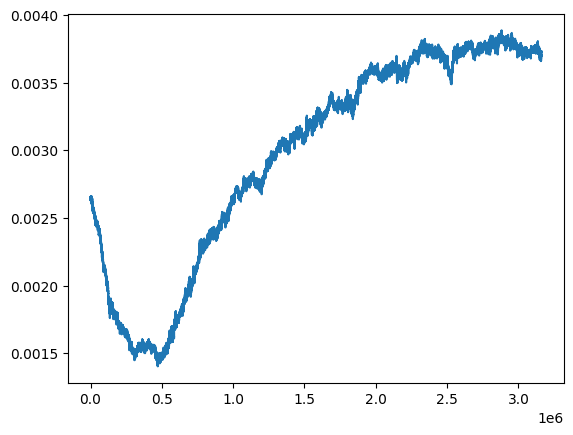

In [5]:
raw.pick(["FCz"])
plt.plot(raw[:,:][0].T)

## apply filter on copy of raw

In [6]:
raw_f = raw.copy().filter(0.1,50, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 33001 samples (33.001 s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


# plot fourier space unfiltered raw

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Max\AppData\Local\Temp\ipykernel_10748\1459269286.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')
C:\Program Files\Python311\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


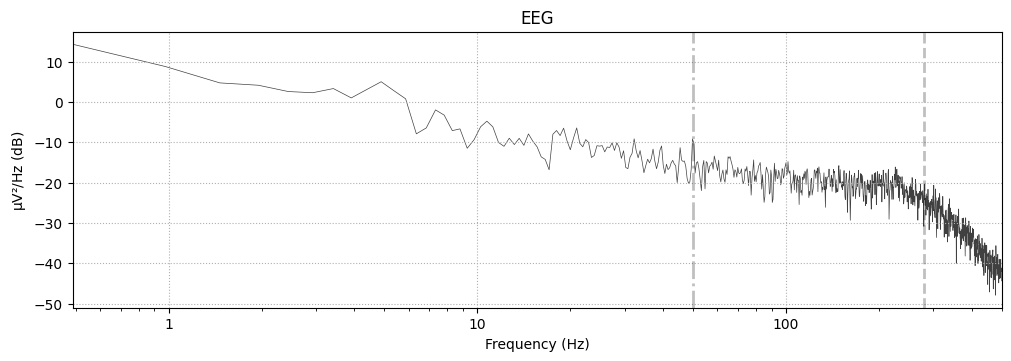

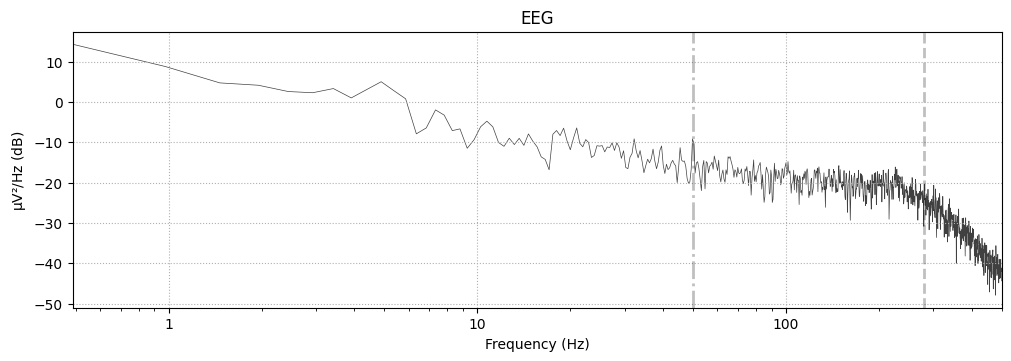

In [11]:
raw.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')

# plot fourier space filtered raw

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Max\AppData\Local\Temp\ipykernel_10748\3066024018.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_f.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')
C:\Program Files\Python311\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


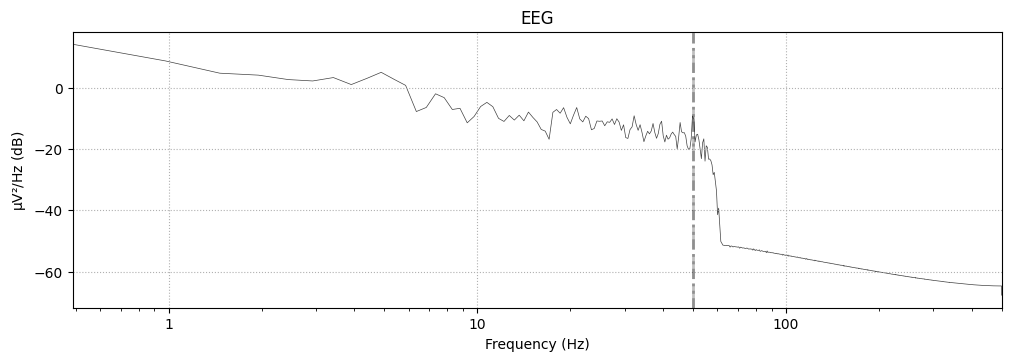

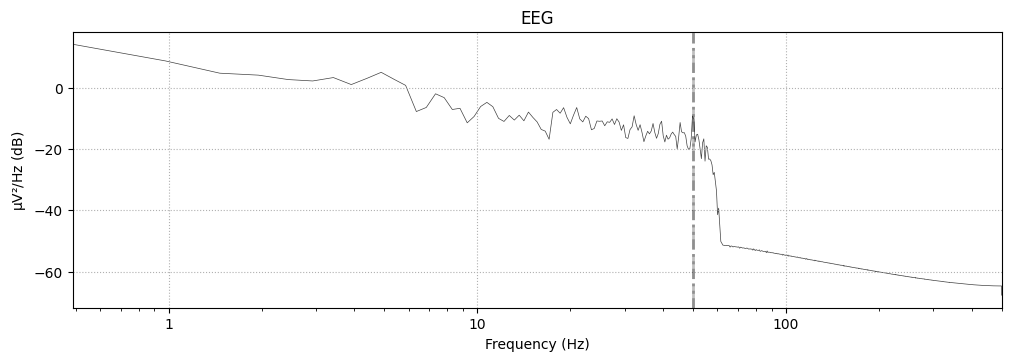

In [10]:
raw_f.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')

# plot filtered and unfiltered with removed DC-offset

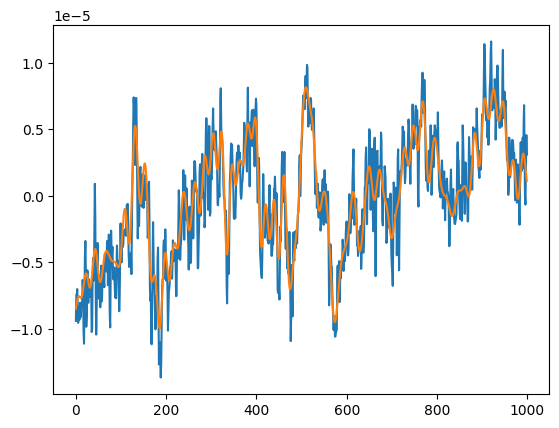

In [12]:
plt.plot(raw[:,0:1000][0].T-np.median(raw[:,0:1000][0].T))
plt.plot(raw_f[:,0:1000][0].T-np.median(raw_f[:,0:1000][0].T))

## with more samples it shows how the original signal drifts away

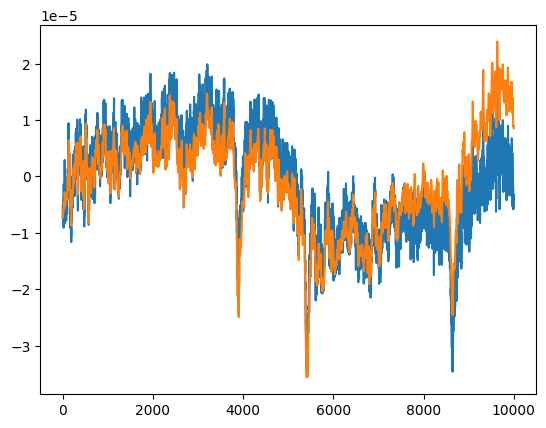

In [15]:
plt.plot(raw[:,0:10000][0].T-np.median(raw[:,0:10000][0].T))
plt.plot(raw_f[:,0:10000][0].T-np.median(raw_f[:,0:10000][0].T))

## exercise replication until here, rest is new testing

## testing notch filter

In [16]:
raw_f_notch = raw_f.copy().notch_filter(freqs=50)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## plot fourier space w/o notch

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Max\AppData\Local\Temp\ipykernel_10748\3066024018.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_f.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')
C:\Program Files\Python311\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


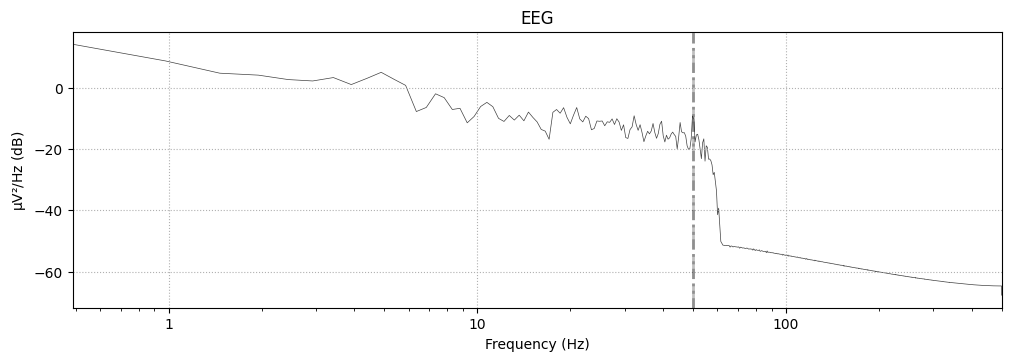

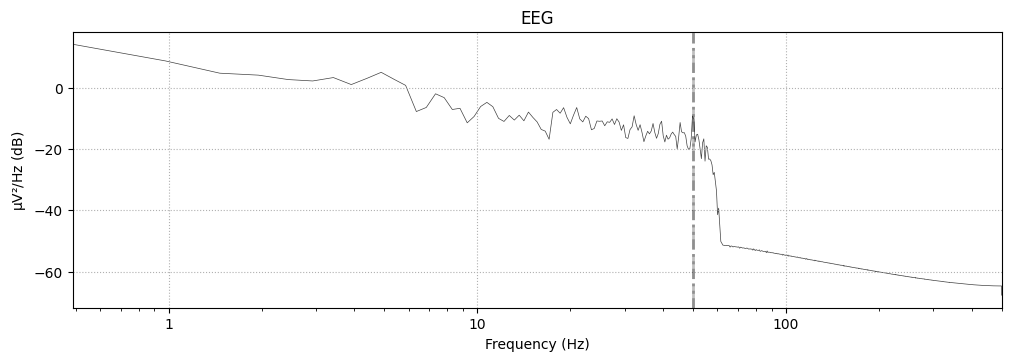

In [17]:
raw_f.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')

## plot fourier space w/ notch

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Max\AppData\Local\Temp\ipykernel_10748\2666599552.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_f_notch.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')
C:\Program Files\Python311\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


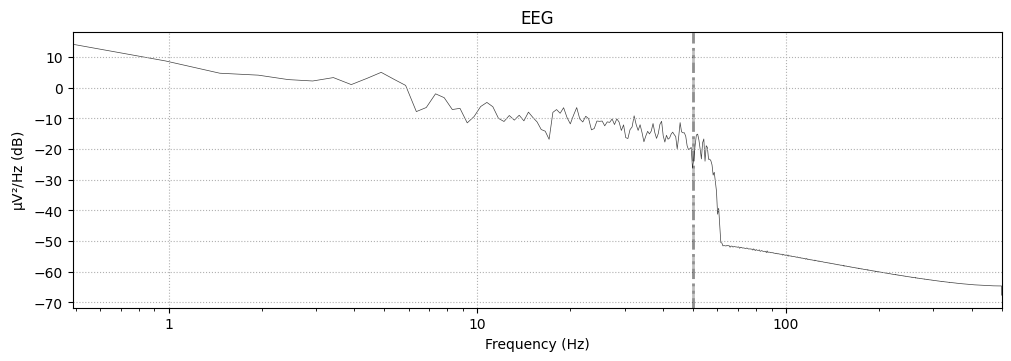

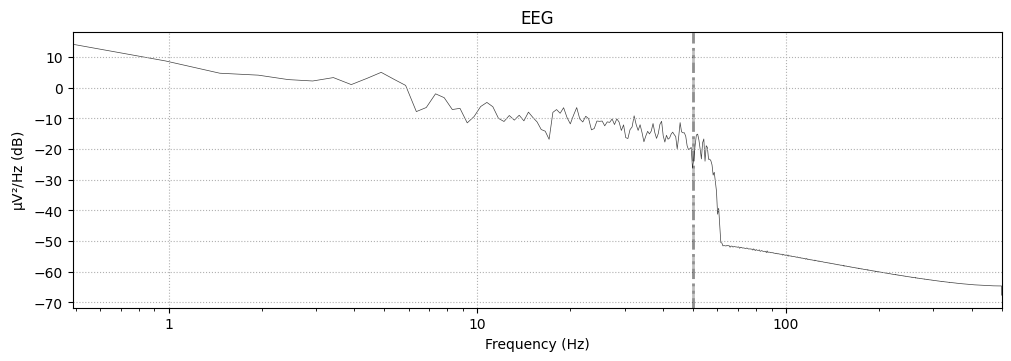

In [18]:
raw_f_notch.plot_psd(area_mode='range', tmax=10.0, average=False, xscale='log')

## compare raw, raw filtered (0.1, 50) and raw filtered witch notch 50hz

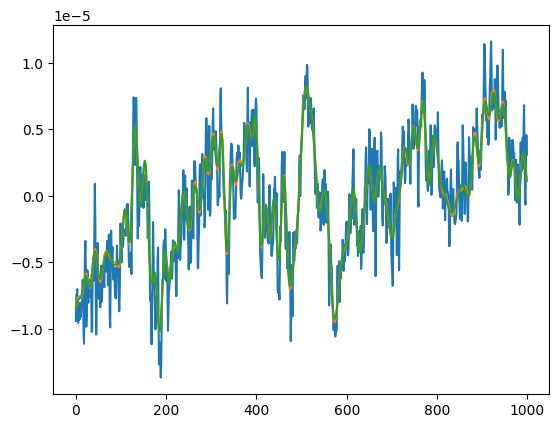

In [19]:
plt.plot(raw[:,0:1000][0].T-np.median(raw[:,0:1000][0].T))
plt.plot(raw_f[:,0:1000][0].T-np.median(raw_f[:,0:1000][0].T))
plt.plot(raw_f_notch[:,0:1000][0].T-np.median(raw_f_notch[:,0:1000][0].T))